In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import rie_estimator
import csestimator

In [12]:
sns.set(rc={'figure.figsize':(15,8.27)})

In [2]:
european_returns = pd.read_csv('/home/dum/Desktop/data/european_market_returns.csv', index_col = "Date")
american_returns = pd.read_csv('/home/dum/Desktop/data/sp_500_returns.csv', index_col = "Date")

In [28]:
norm_european_returns = (european_returns -european_returns.mean()) / european_returns.std()
norm_american_returns = (american_returns -american_returns.mean()) / american_returns.std()

In [34]:
numbs_obser_amer = 800
numbs_obser_eur = 500

In [32]:
samp_corr_european = european_returns.iloc[:numbs_obser_eur,:].corr()
samp_corr_american = american_returns.iloc[:numbs_obser_amer, :].corr()

In [35]:
rie_est_american = rie_estimator.get_rie(norm_american_returns.iloc[:numbs_obser_amer, :])
rie_est_european = rie_estimator.get_rie(norm_european_returns.iloc[:numbs_obser_eur,:])

In [36]:
shrink_estimator_european_5 = csestimator.get_shrinkage_est(norm_european_returns.iloc[:numbs_obser_eur,:], 0.5)
shrink_estimator_american_5 = csestimator.get_shrinkage_est(norm_american_returns.iloc[:numbs_obser_amer,:], 0.5)
shrink_estimator_european_2 = csestimator.get_shrinkage_est(norm_european_returns.iloc[:numbs_obser_eur,:], 0.2)
shrink_estimator_american_2 = csestimator.get_shrinkage_est(norm_american_returns.iloc[:numbs_obser_amer,:], 0.2)
shrink_estimator_european_1 = csestimator.get_shrinkage_est(norm_european_returns.iloc[:numbs_obser_eur,:], 1)
shrink_estimator_american_1 = csestimator.get_shrinkage_est(norm_american_returns.iloc[:numbs_obser_amer,:], 1)

In [37]:
samp_corr_european_norm = norm_european_returns.iloc[:numbs_obser_eur,:].corr()
samp_corr_american_norm = norm_american_returns.iloc[:numbs_obser_amer,:].corr()

Calcular la distancia entre rie y correlacion muestral:

mercado americano

In [38]:
print(np.linalg.norm(((samp_corr_american - rie_est_american).values), ord = "fro"))
print(np.linalg.norm(((samp_corr_american - shrink_estimator_american_5).values), ord = "fro"))
print(np.linalg.norm(((samp_corr_american - shrink_estimator_american_2).values), ord = "fro"))
print(np.linalg.norm(((samp_corr_american - shrink_estimator_american_1).values), ord = "fro"))
print(np.linalg.norm(((rie_est_american - shrink_estimator_american_5)), ord = "fro"))

5.945522728918243
36.10618837852236
14.442475351408932
72.21237675704472
35.18657278772681


mercado europeo

In [39]:
print(np.linalg.norm(((samp_corr_european - rie_est_european).values), ord = "fro"))
print(np.linalg.norm(((samp_corr_european - shrink_estimator_european_5).values), ord = "fro"))
print(np.linalg.norm(((samp_corr_european - shrink_estimator_european_2).values), ord = "fro"))
print(np.linalg.norm(((samp_corr_european - shrink_estimator_european_1).values), ord = "fro"))
print(np.linalg.norm(((rie_est_european - shrink_estimator_european_5)), ord = "fro"))

4.743694031764721
20.68613269337825
8.274453077351293
41.37226538675652
19.760684054056743


### Gráficas de los valores propios con q = 1/2

In [133]:
rie_est_american = rie_estimator.get_rie(norm_american_returns.iloc[:800, :])
rie_est_european = rie_estimator.get_rie(norm_european_returns.iloc[:500,:])

shrink_estimator_european_5 = csestimator.get_shrinkage_est(norm_european_returns.iloc[:500,:], 0.5)
shrink_estimator_american_5 = csestimator.get_shrinkage_est(norm_american_returns.iloc[:800,:], 0.5)
shrink_estimator_european_2 = csestimator.get_shrinkage_est(norm_european_returns.iloc[:500,:], 0.2)
shrink_estimator_american_2 = csestimator.get_shrinkage_est(norm_american_returns.iloc[:800,:], 0.2)
shrink_estimator_european_1 = csestimator.get_shrinkage_est(norm_european_returns.iloc[:500,:], 1)
shrink_estimator_american_1 = csestimator.get_shrinkage_est(norm_american_returns.iloc[:800,:], 1)

samp_corr_european_norm = norm_european_returns.iloc[:500,:].corr()
samp_corr_american_norm = norm_american_returns.iloc[:800,:].corr()

In [134]:
eigenval_sample_american, eigenvec_sample_american = np.linalg.eig(samp_corr_american_norm.values)
eigenval_rie_american, eigenvec_rie_american = np.linalg.eig(rie_est_american)
eigenval_shrink_american, eigenvec_shrink_american = np.linalg.eig(shrink_estimator_american_5)
eigenval_sample_american.sort()
eigenval_rie_american.sort()
eigenval_shrink_american.sort()

In [135]:
eigenval_sample_european, eigenvec_sample_european = np.linalg.eig(samp_corr_european.values)
eigenval_rie_european, eigenvec_rie_european = np.linalg.eig(rie_est_european)
eigenval_shrink_european, eigenvec_shrink_european = np.linalg.eig(shrink_estimator_european_5)
eigenval_sample_european.sort()
eigenval_rie_european.sort()
eigenval_shrink_european.sort()

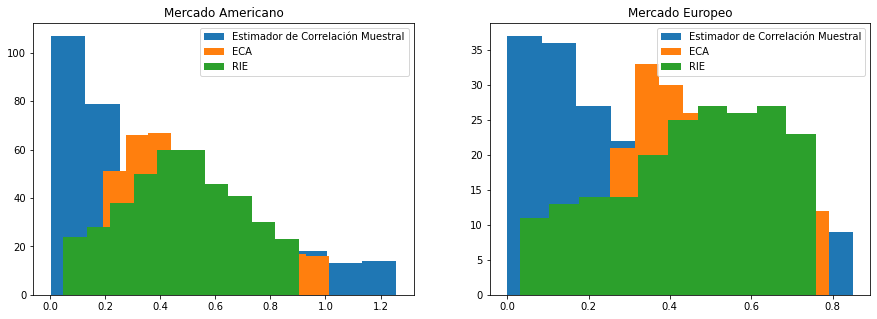

In [136]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].hist(eigenval_sample_american[:400])
axs[0].hist(eigenval_shrink_american[:400])
axs[0].hist(eigenval_rie_american[:400])
axs[0].legend(labels=['Estimador de Correlación Muestral', 'ECA','RIE'])
# "Distribución de los valores propios de los estimadores \n  de correlación. Mercado Americano"
axs[0].set_title("Mercado Americano")

axs[1].hist(eigenval_sample_european[:200])
axs[1].hist(eigenval_shrink_european[:200])
axs[1].hist(eigenval_rie_european[:200])
axs[1].legend(labels=['Estimador de Correlación Muestral', 'ECA','RIE'])
# "Distribución de los valores propios de los estimadores \n de correlación. Mercado Europeo"
axs[1].set_title("Mercado Europeo")
plt.show()

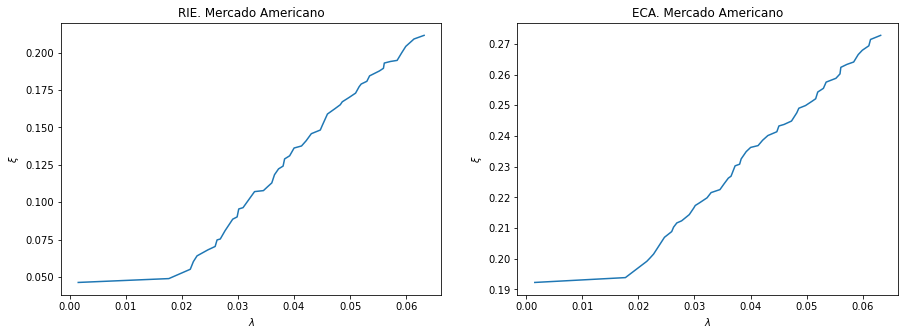

In [137]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].plot(eigenval_sample_american[:50], eigenval_rie_american[:50])
#axs[0].set_title("Comparación de los valores propios del RIE contra Estimador de Correlación Muestral. Mercado Americano
axs[0].set_title("RIE. Mercado Americano")
axs[0].set(ylabel=r'$\xi$', xlabel=r'$\lambda$')

axs[1].plot(eigenval_sample_american[:50], eigenval_shrink_american[:50])
#axs[0].set_title("Comparación de los valores propios del RIE contra Estimador de Correlación Muestral. Mercado Americano
axs[1].set_title("ECA. Mercado Americano")
axs[1].set(ylabel=r'$\xi$', xlabel=r'$\lambda$')
plt.show()


Utilizando el siguiente periodo de tiempo

In [89]:
rie_est_american = rie_estimator.get_rie(norm_american_returns.iloc[801:1600, :])
rie_est_european = rie_estimator.get_rie(norm_european_returns.iloc[501:1000,:])

shrink_estimator_european_5 = csestimator.get_shrinkage_est(norm_european_returns.iloc[501:1000,:], 0.5)
shrink_estimator_american_5 = csestimator.get_shrinkage_est(norm_american_returns.iloc[801:1600,:], 0.5)
shrink_estimator_european_2 = csestimator.get_shrinkage_est(norm_european_returns.iloc[501:1000,:], 0.2)
shrink_estimator_american_2 = csestimator.get_shrinkage_est(norm_american_returns.iloc[801:1600,:], 0.2)
shrink_estimator_european_1 = csestimator.get_shrinkage_est(norm_european_returns.iloc[501:1000,:], 1)
shrink_estimator_american_1 = csestimator.get_shrinkage_est(norm_american_returns.iloc[801:1600,:], 1)

samp_corr_european_norm = norm_european_returns.iloc[501:1000,:].corr()
samp_corr_american_norm = norm_american_returns.iloc[801:1600,:].corr()

In [90]:
eigenval_sample_american, eigenvec_sample_american = np.linalg.eig(samp_corr_american_norm.values)
eigenval_rie_american, eigenvec_rie_american = np.linalg.eig(rie_est_american)
eigenval_shrink_american, eigenvec_shrink_american = np.linalg.eig(shrink_estimator_american_5)
eigenval_sample_american.sort()
eigenval_rie_american.sort()
eigenval_shrink_american.sort()

In [92]:
eigenval_sample_european, eigenvec_sample_european = np.linalg.eig(samp_corr_european.values)
eigenval_rie_european, eigenvec_rie_european = np.linalg.eig(rie_est_european)
eigenval_shrink_european, eigenvec_shrink_european = np.linalg.eig(shrink_estimator_european_5)
eigenval_sample_european.sort()
eigenval_rie_european.sort()
eigenval_shrink_european.sort()

Text(0.5, 1.0, 'Distribución de los valores propios de los estimadores de correlación. Mercado Americano')

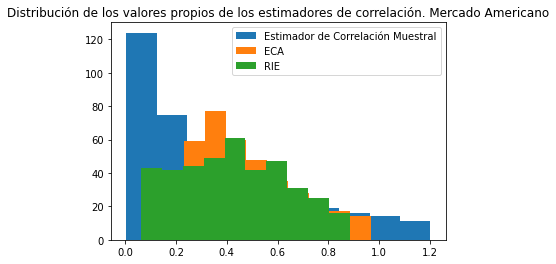

In [93]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].hist(eigenval_sample_american[:400])
axs[0].hist(eigenval_shrink_american[:400])
axs[0].hist(eigenval_rie_american[:400])
axs[0].legend(labels=['Estimador de Correlación Muestral', 'ECA','RIE'])
# "Distribución de los valores propios de los estimadores \n  de correlación. Mercado Americano"
axs[0].set_title("Mercado Americano")

axs[1].hist(eigenval_sample_european[:200])
axs[1].hist(eigenval_shrink_european[:200])
axs[1].hist(eigenval_rie_european[:200])
axs[1].legend(labels=['Estimador de Correlación Muestral', 'ECA','RIE'])
# "Distribución de los valores propios de los estimadores \n de correlación. Mercado Europeo"
axs[1].set_title("Mercado Europeo")
plt.show()

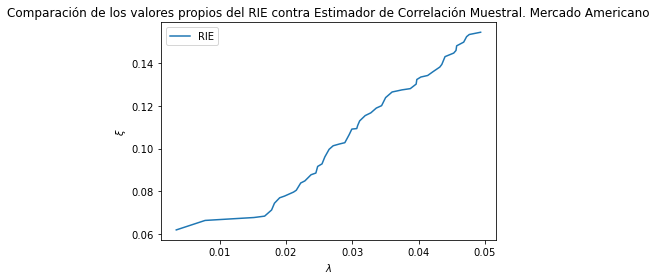

In [95]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].plot(eigenval_sample_american[:50], eigenval_rie_american[:50])
#axs[0].set_title("Comparación de los valores propios del RIE contra Estimador de Correlación Muestral. Mercado Americano
axs[0].set_title("RIE. Mercado Americano")
axs[0].set(ylabel=r'$\xi$', xlabel=r'$\lambda$')

axs[1].plot(eigenval_sample_american[:50], eigenval_shrink_american[:50])
#axs[0].set_title("Comparación de los valores propios del RIE contra Estimador de Correlación Muestral. Mercado Americano
axs[1].set_title("ECA. Mercado Americano")
axs[1].set(ylabel=r'$\xi$', xlabel=r'$\lambda$')
plt.show()


Con el último periodo de tiempo

In [98]:
rie_est_american = rie_estimator.get_rie(norm_american_returns.iloc[1601:, :])
rie_est_european = rie_estimator.get_rie(norm_european_returns.iloc[1001:1500,:])

shrink_estimator_european_5 = csestimator.get_shrinkage_est(norm_european_returns.iloc[1001:1500,:], 0.5)
shrink_estimator_american_5 = csestimator.get_shrinkage_est(norm_american_returns.iloc[1601:,:], 0.5)
shrink_estimator_european_2 = csestimator.get_shrinkage_est(norm_european_returns.iloc[1001:1500,:], 0.2)
shrink_estimator_american_2 = csestimator.get_shrinkage_est(norm_american_returns.iloc[1601:,:], 0.2)
shrink_estimator_european_1 = csestimator.get_shrinkage_est(norm_european_returns.iloc[1001:1500,:], 1)
shrink_estimator_american_1 = csestimator.get_shrinkage_est(norm_american_returns.iloc[1601:,:], 1)

samp_corr_european_norm = norm_european_returns.iloc[1001:1500,:].corr()
samp_corr_american_norm = norm_american_returns.iloc[1601:,:].corr()

In [99]:
eigenval_sample_american, eigenvec_sample_american = np.linalg.eig(samp_corr_american_norm.values)
eigenval_rie_american, eigenvec_rie_american = np.linalg.eig(rie_est_american)
eigenval_shrink_american, eigenvec_shrink_american = np.linalg.eig(shrink_estimator_american_5)
eigenval_sample_american.sort()
eigenval_rie_american.sort()
eigenval_shrink_american.sort()

In [100]:
eigenval_sample_european, eigenvec_sample_european = np.linalg.eig(samp_corr_european.values)
eigenval_rie_european, eigenvec_rie_european = np.linalg.eig(rie_est_european)
eigenval_shrink_european, eigenvec_shrink_european = np.linalg.eig(shrink_estimator_european_5)
eigenval_sample_european.sort()
eigenval_rie_european.sort()
eigenval_shrink_european.sort()

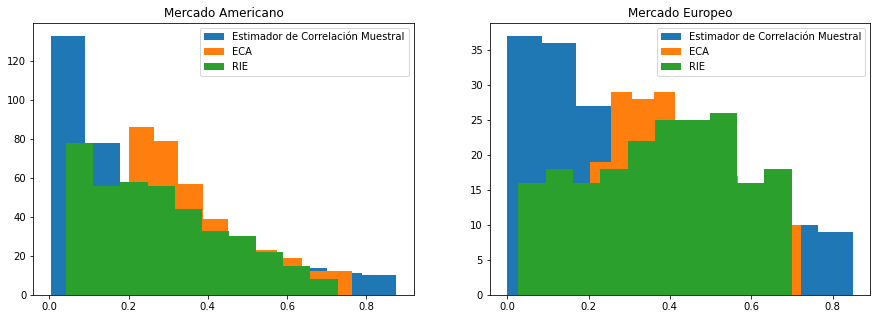

In [122]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].hist(eigenval_sample_american[:400])
axs[0].hist(eigenval_shrink_american[:400])
axs[0].hist(eigenval_rie_american[:400])
axs[0].legend(labels=['Estimador de Correlación Muestral', 'ECA','RIE'])
# "Distribución de los valores propios de los estimadores \n  de correlación. Mercado Americano"
axs[0].set_title("Mercado Americano")

axs[1].hist(eigenval_sample_european[:200])
axs[1].hist(eigenval_shrink_european[:200])
axs[1].hist(eigenval_rie_european[:200])
axs[1].legend(labels=['Estimador de Correlación Muestral', 'ECA','RIE'])
# "Distribución de los valores propios de los estimadores \n de correlación. Mercado Europeo"
axs[1].set_title("Mercado Europeo")
plt.show()

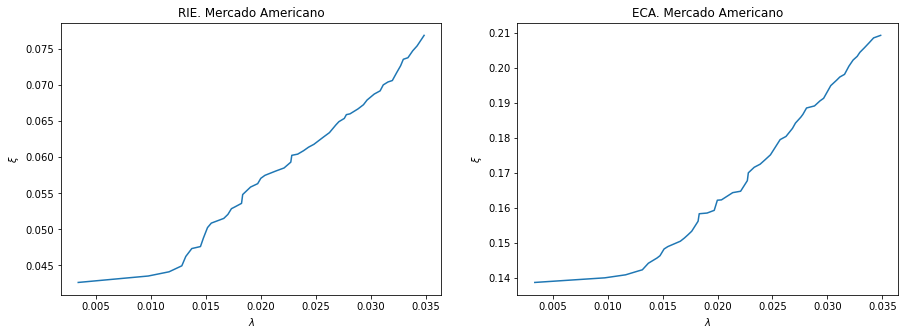

In [127]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].plot(eigenval_sample_american[:50], eigenval_rie_american[:50])
#axs[0].set_title("Comparación de los valores propios del RIE contra Estimador de Correlación Muestral. Mercado Americano
axs[0].set_title("RIE. Mercado Americano")
axs[0].set(ylabel=r'$\xi$', xlabel=r'$\lambda$')

axs[1].plot(eigenval_sample_american[:50], eigenval_shrink_american[:50])
#axs[0].set_title("Comparación de los valores propios del RIE contra Estimador de Correlación Muestral. Mercado Americano
axs[1].set_title("ECA. Mercado Americano")
axs[1].set(ylabel=r'$\xi$', xlabel=r'$\lambda$')
plt.show()


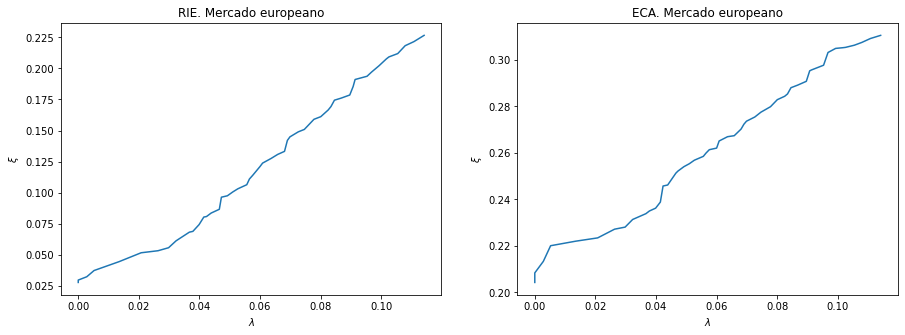

In [128]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].plot(eigenval_sample_european[:50], eigenval_rie_european[:50])
#axs[0].set_title("Comparación de los valores propios del RIE contra Estimador de Correlación Muestral. Mercado europeano
axs[0].set_title("RIE. Mercado europeano")
axs[0].set(ylabel=r'$\xi$', xlabel=r'$\lambda$')

axs[1].plot(eigenval_sample_european[:50], eigenval_shrink_european[:50])
#axs[0].set_title("Comparación de los valores propios del RIE contra Estimador de Correlación Muestral. Mercado europeano
axs[1].set_title("ECA. Mercado europeano")
axs[1].set(ylabel=r'$\xi$', xlabel=r'$\lambda$')
plt.show()


## Obtener matrices por clustering y su gráfica

### Mercado Europeo

In [3]:
estim, labels = csestimator.get_shrinkage_est(european_returns, 0.5, return_labels = True)

In [4]:
european_returns_sorted = european_returns.iloc[:, labels.argsort()]

In [5]:
R_matrix = np.corrcoef(european_returns_sorted.T)
D_matrix = 1 - R_matrix

In [6]:
labels.sort()

In [7]:
S_matrix = csestimator.get_S_matrix(R_matrix, labels)
R_tilde = csestimator.get_R_tilde(S_matrix, labels)


Text(0.5, 1.0, 'ECA con $\\alpha = 1$')

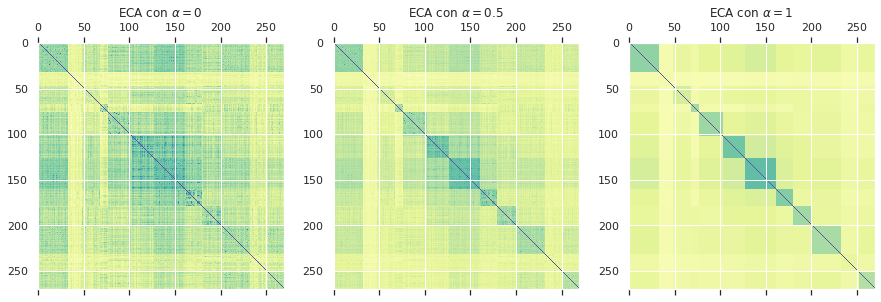

In [22]:
# cambiar colores de los heatmaps

R_clust_half = csestimator.get_R_clust(R_matrix, R_tilde, 0.5)
R_clust_zero = csestimator.get_R_clust(R_matrix, R_tilde, 0)
R_clust_one = csestimator.get_R_clust(R_matrix, R_tilde, 1)
np.fill_diagonal(R_clust_one, 1)
np.fill_diagonal(R_clust_zero, 1)
np.fill_diagonal(R_clust_half, 1)
fig, axs = plt.subplots(1,3)
#fig.set_size_inches(18.5, 10.5)
axs[0].matshow(R_clust_zero, vmin=-1, vmax=1, cmap="Spectral")
axs[0].set_title(r"ECA con $\alpha = 0$")
axs[1].matshow(R_clust_half, vmin=-1, vmax=1, cmap = "Spectral")
axs[1].set_title(r"ECA con $\alpha = 0.5$")
axs[2].matshow(R_clust_one, vmin=-1, vmax=1, cmap = "Spectral")
axs[2].set_title(r"ECA con $\alpha = 1$")

### Mercado Americano

In [37]:
estim, labels = csestimator.get_shrinkage_est(american_returns, 0.5, return_labels = True)

In [38]:
american_returns_sorted = american_returns.iloc[:, labels.argsort()]

In [39]:
R_matrix = np.corrcoef(american_returns_sorted.T)
D_matrix = 1 - R_matrix

In [40]:
labels.sort()

In [41]:
S_matrix = csestimator.get_S_matrix(R_matrix, labels)
R_tilde = csestimator.get_R_tilde(S_matrix, labels)

Text(0.5, 1.0, 'ECA con $\\alpha = 1$')

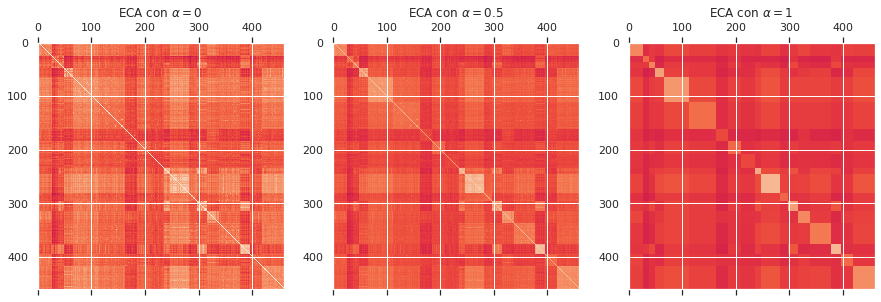

In [42]:
R_clust_half = csestimator.get_R_clust(R_matrix, R_tilde, 0.5)
R_clust_zero = csestimator.get_R_clust(R_matrix, R_tilde, 0)
R_clust_one = csestimator.get_R_clust(R_matrix, R_tilde, 1)
fig, axs = plt.subplots(1,3)
#fig.set_size_inches(18.5, 10.5)
axs[0].matshow(R_clust_zero, vmin=-1, vmax=1)
axs[0].set_title(r"ECA con $\alpha = 0$")
axs[1].matshow(R_clust_half, vmin=-1, vmax=1)
axs[1].set_title(r"ECA con $\alpha = 0.5$")
axs[2].matshow(R_clust_one, vmin=-1, vmax=1)
axs[2].set_title(r"ECA con $\alpha = 1$")
#fig.colorbar(cax)

In [49]:
print(pd.Series(american_returns.columns).to_latex())

\begin{tabular}{ll}
\toprule
{} &      0 \\
\midrule
0   &      A \\
1   &    AAL \\
2   &    AAP \\
3   &   AAPL \\
4   &    ABC \\
5   &   ABMD \\
6   &    ABT \\
7   &    ACN \\
8   &   ADBE \\
9   &    ADI \\
10  &    ADM \\
11  &    ADP \\
12  &   ADSK \\
13  &    AEE \\
14  &    AEP \\
15  &    AES \\
16  &    AFL \\
17  &    AIG \\
18  &    AIZ \\
19  &    AJG \\
20  &   AKAM \\
21  &    ALB \\
22  &   ALGN \\
23  &    ALK \\
24  &    ALL \\
25  &   AMAT \\
26  &    AMD \\
27  &    AME \\
28  &   AMGN \\
29  &    AMP \\
30  &    AMT \\
31  &   AMZN \\
32  &   ANSS \\
33  &   ANTM \\
34  &    AON \\
35  &    AOS \\
36  &    APA \\
37  &    APD \\
38  &    APH \\
39  &   APTV \\
40  &    ARE \\
41  &    ATO \\
42  &   ATVI \\
43  &    AVB \\
44  &   AVGO \\
45  &    AVY \\
46  &    AWK \\
47  &    AXP \\
48  &    AZO \\
49  &     BA \\
50  &    BAC \\
51  &    BAX \\
52  &   BBWI \\
53  &    BBY \\
54  &    BDX \\
55  &    BEN \\
56  &   BF-B \\
57  &   BIIB \\
58  &    BIO \\
59 